In [22]:
from ultralytics import YOLO, settings
import os
import numpy as np
import shutil
import random
import torch

torch.cuda.empty_cache()

IMG_PATH_FIXED = rf'C:\Users\buyse\Workspace\NTNU\images\cropped_scales\fixed'
IMG_PATH_RANDOM = rf'C:\Users\buyse\Workspace\NTNU\images\cropped_scales\random'
MODEL_PATH = rf"C:\Users\buyse\Workspace\NTNU\models\tape_detector_v4.pt"

settings.update({'runs_dir': rf'C:\Users\buyse\Workspace\NTNU\models\runs'})

all_images_fixed = os.listdir(IMG_PATH_FIXED)
all_images_random = os.listdir(IMG_PATH_RANDOM)

random.shuffle(all_images_fixed)
random.shuffle(all_images_random)

test_images = [os.path.join(IMG_PATH_FIXED, img) for img in all_images_fixed[:5] if 'only' not in img and 'grid' not in img]
test_images2 = [os.path.join(IMG_PATH_RANDOM, img) for img in all_images_random[:5] if 'only' not in img and 'grid' not in img]

combined = test_images + test_images2

model = YOLO(MODEL_PATH)
results = model(combined, save=True, show_conf=True, conf=0.5, verbose=False, retina_masks=True)

Results saved to C:\Users\buyse\Workspace\NTNU\models\runs\segment\predict7


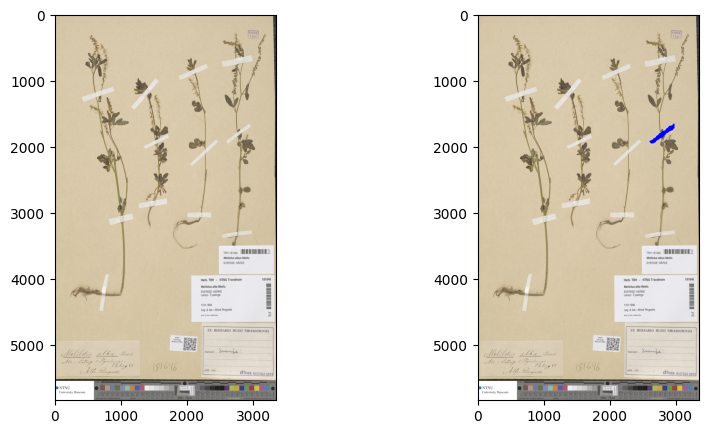

In [23]:
import matplotlib.pyplot as plt
import cv2

res = results[0]

mask = res.masks.data[0].cpu().numpy().astype(np.bool_)
image = res.orig_img
image[mask] = [255, 0, 0]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

orig_img = cv2.imread(res.path)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(orig_img)
ax[1].imshow(image)
plt.show()

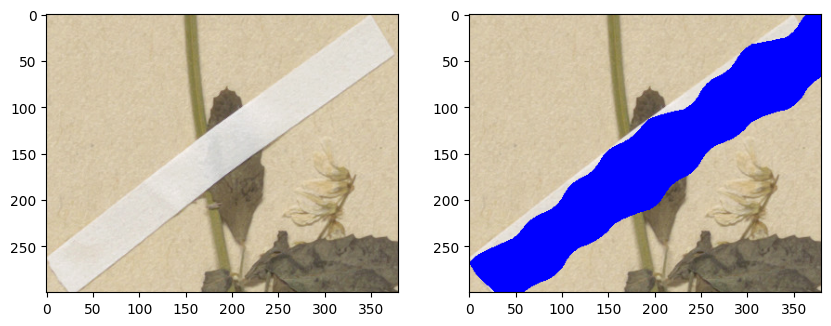

In [25]:
box = res.boxes.xyxyn[0].cpu().numpy()
image_width, image_height = res.orig_shape[1], res.orig_shape[0]
x, y, w, h = box[0] * image_width, box[1] * image_height, (box[2] - box[0]) * image_width, (box[3] - box[1]) * image_height
crop = image[int(y):int(y+h), int(x):int(x+w)]
crop_orig = orig_img[int(y):int(y+h), int(x):int(x+w)]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(crop_orig)
ax[1].imshow(crop)
plt.show()